# Plotting data in Python using Pandas, Matplotlib and Seaborn

In this tutorial you will learn:
- Basic data wrangling using the pandas library
- How to create plots using matplotlib and seaborn


Let's start with some imports:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

& loading the data. The `metadata.csv` file contains metadata on the embryo level like cell*count* or wheter it's a *control* embryo. `all_features.csv` contains the single-cell measurements, whereas the individual objects are uniquely identified by their `filename_prefix` and `Label`.

In [2]:
metadata = pd.read_csv('metadata.csv')
features_all = pd.read_csv('features.csv')

In [3]:
features_all = features_all.set_index(['filename_prefix', 'Label'])
metadata = metadata.set_index('filename_prefix')

Look at the first 5 row of the dataframes and try to understand them.

In [4]:
metadata.head()

,count,log2_count,cycle,control,replicate,turned
filename_prefix,,,,,,
20210331_Timecourse5EU_s10_NA,270,8.076816,8.0,False,0,False
20210331_Timecourse5EU_s11_NA,3773,11.881496,12.0,False,0,False
20210331_Timecourse5EU_s12_NA,541,9.079485,9.0,False,0,False
20210331_Timecourse5EU_s13_NA,126,6.977280,7.0,False,0,False
20210331_Timecourse5EU_s14_NA,4005,11.967587,12.0,False,0,False


In [5]:
features_all.head()

structure  PhysicalSize  Roundness  \
filename_prefix               Label                                      
20210331_Timecourse5EU_s10_NA 1         cells      54367.30   0.632657   
                              3         cells      65142.74   0.593915   
                              4         cells      46130.24   0.700349   
                              5         cells      56567.68   0.688103   
                              6         cells      56961.45   0.631558   

                                     5-EU_0_Mean  5-EU_0_Skewness  \
filename_prefix               Label                                 
20210331_Timecourse5EU_s10_NA 1        72.697078         0.131292   
                              3        69.716832         0.272255   
                              4        73.925593         0.592808   
                              5        70.302761         0.595058   
                              6        73.151610         0.176252   

                                     SYTOX_0_Mean  SYTOX_0_Sum  
filename_prefix               Label                             
20210331_Timecourse5EU_s10_NA 1         15.179888     488337.0  
                              3         38.302029    1476390.0  
                              4         14.503077     395876.0  
                              5         32.896720    1101119.0  
                              6         37.839430    1275378.0

Lets split the `features_all` dataframe into more managable chunks containing only measurements for one type of object.

In [6]:
features_nuclei = features_all[features_all['structure'] == 'nuclei']
features_cells = features_all[features_all['structure'] == 'cells']
features_cyto = features_all[features_all['structure'] == 'cyto']

## Using cell count to stage the embryos
We can sort the emrbyos by cellcount and use the cellcount as a proxy for the age of the emrbyo.

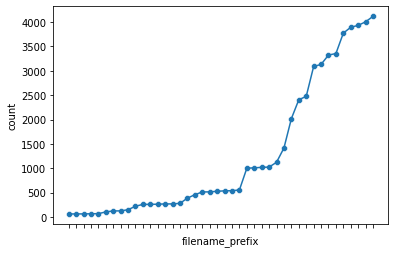

In [7]:
to_plot = metadata.sort_values(by='count').reset_index()

ax = sns.scatterplot(x=to_plot['filename_prefix'], y=to_plot['count'])
ax = sns.lineplot(x=to_plot['filename_prefix'], y=to_plot['count'])

plt.xticks()
ax.set_xticklabels([])
plt.show()

#### Exercise 1:
Use the `metadata` dataframe, sort the embryos by `log2_count` and make a plot showing the sorted embryo index on the x-axis and the log2_count on the y-axis.  
*Extra credit: Visualize the replicate and embryo was from and wheter it's a control embryo or not in the same plot.*

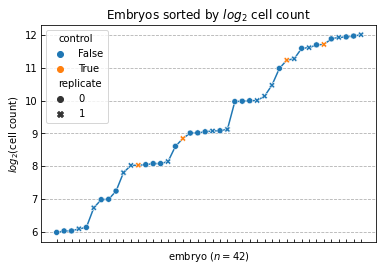

In [8]:
to_plot = metadata.sort_values(by='count').reset_index()
# to_plot = to_plot[to_plot.replicate==1]

ax = sns.scatterplot(x=to_plot['filename_prefix'], y=to_plot['log2_count'], hue=to_plot['control'], style=to_plot['replicate'])
plt.setp(ax.lines, zorder=100)
plt.setp(ax.collections, zorder=100, label="")
ax = sns.lineplot(x=to_plot['filename_prefix'], y=to_plot['log2_count'])
plt.grid(axis='y', linestyle='--')
plt.xlabel('embryo ($n=42$)')
plt.ylabel('$log_2$(cell count)')
plt.xticks()
ax.set_xticklabels([])
ax.tick_params(direction='in')
plt.title('Embryos sorted by $log_{2}$ cell count')
plt.show()

## Aggregating measurements on the embryo level
Using `groupby` we can aggregate single cell measurements for the individual embryos. Read the [documentation](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.groupby.html) to understand what groupby is doing and see some examples.  
Using `merge` we can combine two dataframes on a common column (or index). Again, the [documentation](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.merge.html) is your friend.  

With those two operations we can start making interesting plots from our measurements. Say we're interested in how the nuclear volume changes over time:

In [9]:
mean_nuclear_size_per_embryo = features_nuclei[['PhysicalSize']].groupby('filename_prefix').mean()
mean_nuclear_size_per_embryo.head()

,PhysicalSize
filename_prefix,
20210331_Timecourse5EU_s10_NA,1922.349963
20210331_Timecourse5EU_s11_NA,1250.188810
20210331_Timecourse5EU_s12_NA,2074.676488
20210331_Timecourse5EU_s13_NA,2229.834286
20210331_Timecourse5EU_s14_NA,880.682841


Merging with the metadata dataframe on the `filename_prefix` allows us to plot cellcount vs. mean nuclear size.

In [10]:
to_plot = mean_nuclear_size_per_embryo.merge(metadata, left_index=True, right_index=True)
to_plot.head()

,PhysicalSize,count,log2_count,cycle,control,replicate,turned
filename_prefix,,,,,,,
20210331_Timecourse5EU_s10_NA,1922.349963,270,8.076816,8.0,False,0,False
20210331_Timecourse5EU_s11_NA,1250.188810,3773,11.881496,12.0,False,0,False
20210331_Timecourse5EU_s12_NA,2074.676488,541,9.079485,9.0,False,0,False
20210331_Timecourse5EU_s13_NA,2229.834286,126,6.977280,7.0,False,0,False
20210331_Timecourse5EU_s14_NA,880.682841,4005,11.967587,12.0,False,0,False


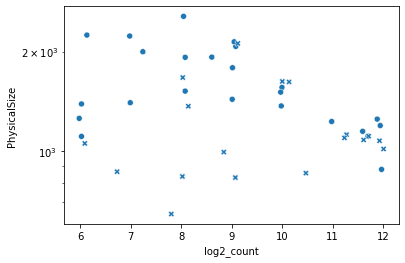

In [11]:
ax = sns.scatterplot(x=to_plot['log2_count'], y=to_plot['PhysicalSize'], style=to_plot['replicate'], legend=False, label='cells')
ax.set_yscale('log') #This is how one can set an axis scale to logarighmic

### Exercise 2:
Plot both nuclear and cellular volume against log2 cell count.  
*Extra credit: Plot both on the same axis.*

Text(0.5, 1.0, 'Mean Cellular and Nuclear Volume')

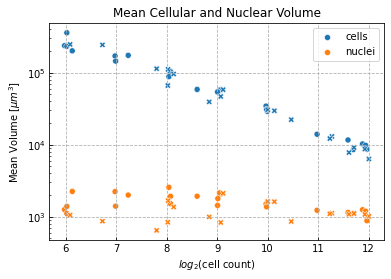

In [12]:
to_plot = features_all.reset_index().set_index('filename_prefix').merge(metadata, left_index=True, right_index=True)
to_plot = to_plot.groupby(['filename_prefix', 'structure']).mean()['PhysicalSize'].unstack('structure')[['cells', 'nuclei', 'cyto']].reset_index()
to_plot = to_plot.set_index('filename_prefix').merge(metadata, left_index=True, right_index=True)

ax = sns.scatterplot(x=to_plot['log2_count'], y=to_plot['cells'], style=to_plot['replicate'], legend=False, label='cells')
ax = sns.scatterplot(x=to_plot['log2_count'], y=to_plot['nuclei'], style=to_plot['replicate'], legend=False, label='nuclei')

ax.set_yscale('log')
ax.tick_params(which='both', direction='in')
plt.ylabel('Mean Volume [$\mu m^3$]')
plt.xlabel('$log_2$(cell count)')
plt.legend()
plt.grid(linestyle='--')
plt.title('Mean Cellular and Nuclear Volume')

### Exercise 3:
A hypothesis in the field is that cells start to get transcriptionally active at a certain nuclear to cytoplasmic ratio. Make a plot showing how the mean nuclear to cytoplasmic ratio changes over time.  
**Hint:** You need to calculate the nuclear to cytoplasmic ratio from the `PhysicalSize` of the cytoplasm and nucleus.

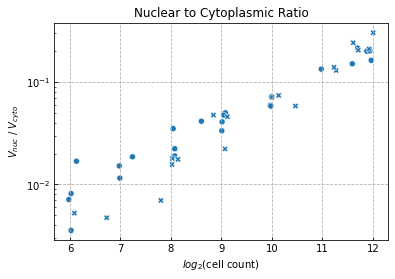

In [13]:
to_plot = features_all.reset_index().set_index('filename_prefix').merge(metadata, left_index=True, right_index=True)
to_plot = to_plot.groupby(['filename_prefix', 'structure']).sum()['PhysicalSize'].unstack('structure')[['cells', 'nuclei', 'cyto']].reset_index()
to_plot = to_plot.set_index('filename_prefix').merge(metadata, left_index=True, right_index=True)

ax = sns.scatterplot(x=to_plot['log2_count'], y=to_plot['nuclei'] / to_plot['cyto'], style=to_plot['replicate'], legend=False, label='cells')
# ax = sns.scatterplot(x=to_plot['log2_count'], y=to_plot['nuclei'], style=to_plot['replicate'], legend=False, label='nuclei')

ax.set_yscale('log')
ax.tick_params(which='both', direction='in')

plt.ylabel('$V_{nuc}$ / $V_{cyto}$')
plt.xlabel('$log_2$(cell count)')
# plt.legend()
plt.grid(linestyle='--')
plt.title('Nuclear to Cytoplasmic Ratio')
plt.show()

Let's look at how mean nuclear 5-EU (our measure for zygotic transcription) signal changes over time. 

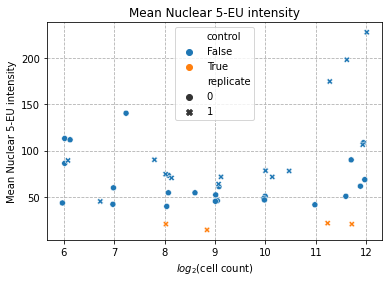

In [14]:
to_plot = features_all.reset_index().set_index('filename_prefix').merge(metadata, left_index=True, right_index=True)

ax.tick_params(which='both', direction='in')

means = to_plot[['structure', '5-EU_0_Mean']].groupby(['filename_prefix', 'structure']).mean().unstack('structure')
means.columns = ['_'.join(k) for k in means.columns]
means = means.merge(metadata, left_index=True, right_index=True)

ax = sns.scatterplot(data=means, x='log2_count', y='5-EU_0_Mean_nuclei', hue='control', style='replicate')
plt.setp(ax.lines, zorder=100)
plt.setp(ax.collections, zorder=100)

plt.ylabel('Mean Nuclear 5-EU intensity')
plt.xlabel('$log_2$(cell count)')
plt.legend(loc=9)
plt.title('Mean Nuclear 5-EU intensity')
plt.grid(linestyle='--')

We can see that using the nuclear 5-EU intensity as a measure for transcriptional output is very noisy. There seem to be some early embryos that have rather high 5-EU signal. If we take a look at the images of early stage embryos we can see that our measurements are heavily biased by stong background signal stemming from the yolk of the embryo. To get to a more robust quantification of transctiptional output we can try normalizing the signal by dividing mean nuclear 5-EU signal by cytoplasmic 5-EU signal.

### Exercise 4:
Create a more robust measure of transcriptional output by dividing nuclear / cytoplasmic 5-EU signal. Show how this more robust quantification changes over time.  
*Extra credit: Can you come up with an alternative way of normalizing the nuclear 5-EU signal? Make a plot.*

Text(0.5, 0, '$log_2$(cell count)')

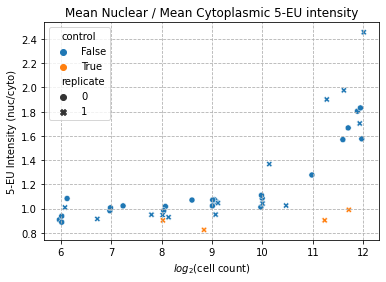

In [15]:
ax.tick_params(which='both', direction='in')

to_plot = features_nuclei[['5-EU_0_Mean']] / features_cyto[['5-EU_0_Mean']]
to_plot.columns = ['5-EU_0_Mean_nuc/cyto']
to_plot = to_plot.dropna()
to_plot = to_plot.reset_index()[['filename_prefix', '5-EU_0_Mean_nuc/cyto']].groupby('filename_prefix').mean().merge(metadata, left_index=True, right_index=True)
# to_plot = to_plot[to_plot.replicate==1]

plt.title('Mean Nuclear / Mean Cytoplasmic 5-EU intensity')
plt.ylabel('5-EU Intensity (nuc/cyto)')
ax = sns.scatterplot(x=to_plot['log2_count'], y=to_plot['5-EU_0_Mean_nuc/cyto'], hue=to_plot['control'], style=to_plot['replicate'])
plt.grid(linestyle='--')
plt.xlabel('$log_2$(cell count)')

Text(0.5, 0, '$log_2$(cell count)')

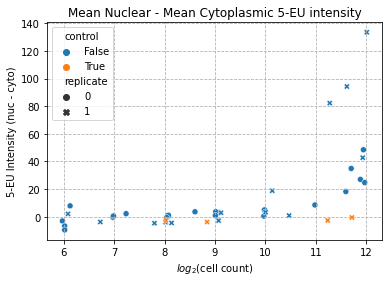

In [16]:
ax.tick_params(which='both', direction='in')

to_plot = features_nuclei[['5-EU_0_Mean']] - features_cyto[['5-EU_0_Mean']]
to_plot.columns = ['5-EU_0_Mean_nuc/cyto']
to_plot = to_plot.dropna()
to_plot = to_plot.reset_index()[['filename_prefix', '5-EU_0_Mean_nuc/cyto']].groupby('filename_prefix').mean().merge(metadata, left_index=True, right_index=True)
# to_plot = to_plot[to_plot.replicate==1]

plt.title('Mean Nuclear - Mean Cytoplasmic 5-EU intensity')
plt.ylabel('5-EU Intensity (nuc - cyto)')
ax = sns.scatterplot(x=to_plot['log2_count'], y=to_plot['5-EU_0_Mean_nuc/cyto'], hue=to_plot['control'], style=to_plot['replicate'])
plt.grid(linestyle='--')
plt.xlabel('$log_2$(cell count)')

## Plotting single cell measurements
Up to this point we always averaged over whole embryos. In the final part of the analysis we would like to look at transcriptional activity on the single cell level. We can make the same plot from Exercise 4 withouth averaging over embryos but actually plotting the single cell measurements. For this part of the exercise we will only use the embryos from the second replicate.

In [17]:
to_plot = pd.DataFrame()
to_plot['5-EU_0_Mean_nuc/cyto'] = features_nuclei[['5-EU_0_Mean']] / features_cyto[['5-EU_0_Mean']]
to_plot['Vnuc/Vcyto'] = features_nuclei['PhysicalSize'] / features_cyto['PhysicalSize']
to_plot['5-EU_0_Skewness'] = features_nuclei['5-EU_0_Skewness']
to_plot = to_plot.merge(metadata, left_index=True, right_index=True)
to_plot = to_plot[to_plot.replicate==1]
to_plot = to_plot[to_plot.control==False]
to_plot = to_plot.merge(features_cells[['PhysicalSize']], left_index=True, right_index=True)
to_plot['log_PhysicalSize'] = np.log(to_plot['PhysicalSize'])
to_plot = to_plot.reset_index()[['log_PhysicalSize', '5-EU_0_Mean_nuc/cyto', 'Vnuc/Vcyto', '5-EU_0_Skewness', 'cycle', 'log2_count', 'filename_prefix', 'PhysicalSize']]
to_plot['filename_prefix'] = to_plot['filename_prefix'].astype('category')
to_plot['cycle'] = to_plot['cycle'].astype('category')

Text(0.5, 1.0, 'Single cell nuclear 5-EU intensity vs volume')

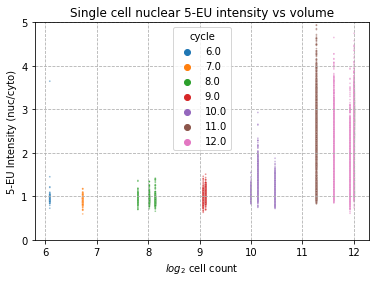

In [18]:
sns.scatterplot(x=to_plot['log2_count'], y=to_plot['5-EU_0_Mean_nuc/cyto'], hue=to_plot['cycle'], s=3, alpha=0.5)
ax.set_xscale('log')
ax.tick_params(which='both', direction='in')

plt.grid(linestyle='--')
# plt.xlim(1e3, 1e6)
plt.ylim(0, 5)
plt.xlabel('$log_2$ cell count')
plt.ylabel('5-EU Intensity (nuc/cyto)')
plt.title('Single cell nuclear 5-EU intensity vs volume')

We can clearly see that around cycle 10 we have the first transcriptionally active cells. There is a problem with overplotting tough as all the cells in an embryo have the same cell count. Let's try plotting cell size vs 5-EU intensity.

Text(0.5, 1.0, 'Single cell nuclear 5-EU intensity vs cell volume')

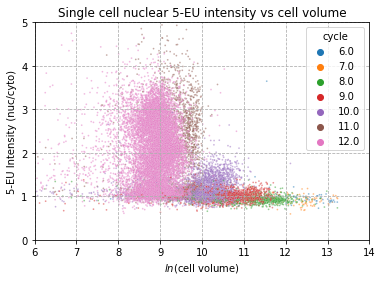

In [19]:
sns.scatterplot(x=to_plot['log_PhysicalSize'], y=to_plot['5-EU_0_Mean_nuc/cyto'], hue=to_plot['cycle'], s=3, alpha=0.5)
ax.set_xscale('log')
ax.tick_params(which='both', direction='in')

plt.grid(linestyle='--')
plt.xlim(6, 14)
plt.ylim(0, 5)
plt.xlabel('$ln($cell volume$)$')
plt.ylabel('5-EU Intensity (nuc/cyto)')
plt.title('Single cell nuclear 5-EU intensity vs cell volume')

### Exercise 5:
Plot the nuclear to cytoplasmic ratio vs 5-EU intensity on the single cell level.

(0.0, 5.0)

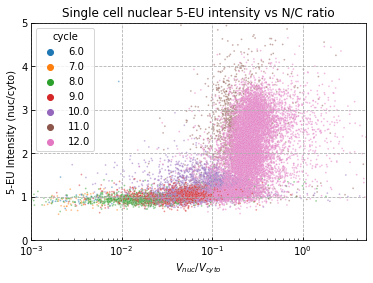

In [20]:
ax = sns.scatterplot(x=to_plot['Vnuc/Vcyto'], y=to_plot['5-EU_0_Mean_nuc/cyto'], hue=to_plot['cycle'], s=3, alpha=0.5)
ax.set_xscale('log')
ax.tick_params(which='both', direction='in')

plt.grid(linestyle='--')
plt.xlabel('$V_{nuc}/V_{cyto}$')
plt.ylabel('5-EU Intensity (nuc/cyto)')
plt.title('Single cell nuclear 5-EU intensity vs N/C ratio')
plt.xlim(1e-3, 5e0)
plt.ylim(0, 5)

### Exercise 6:
Have a look at the [skewness](https://en.wikipedia.org/wiki/Skewness) of the 5-EU signal. What do you notice?  
*Extra credit: Use 5-EU skewness and intensity to detect 'early onset' cells.*

(-1.8, 5.8)

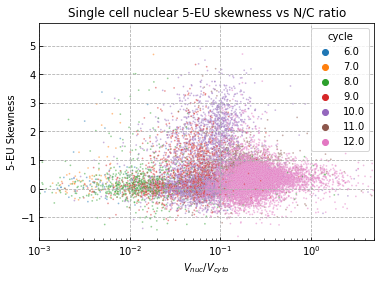

In [21]:
ax = sns.scatterplot(x=to_plot['Vnuc/Vcyto'], y=to_plot['5-EU_0_Skewness'], hue=to_plot['cycle'], s=3, alpha=0.5)
ax.set_xscale('log')
ax.tick_params(which='both', direction='in')

plt.grid(linestyle='--')
plt.xlabel('$V_{nuc}/V_{cyto}$')
plt.ylabel('5-EU Skewness')
plt.title('Single cell nuclear 5-EU skewness vs N/C ratio')
plt.xlim(1e-3, 5e0)
plt.ylim(-1.8, 5.8)